# Week #1 Intro

## Exercise #1: read and show an image, get pixel values
* skimage.io
* cv2

Download "kitty.jpg" image

In [13]:
!wget -O kitty.jpg 'https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe' 

--2023-08-14 09:32:41--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe


Resolving drive.google.com (drive.google.com)... 2404:6800:4001:806::200e, 142.250.199.14
Connecting to drive.google.com (drive.google.com)|2404:6800:4001:806::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i2a3qfaufm6r0qu13r046n5fbn7m9p62/1691980350000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=5d78742b-dd22-4502-8b6c-7008a3e1fdca [following]
--2023-08-14 09:32:42--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i2a3qfaufm6r0qu13r046n5fbn7m9p62/1691980350000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=5d78742b-dd22-4502-8b6c-7008a3e1fdca
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 2404:6800:4001:809::2001, 142.251.223.65
Connecting to doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)|2404:6800:4001:809:

In [14]:
!pip install -r ../requirements.txt

  Using cached opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)
     |████████████████████████████████| 1.8 MB 8.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/jirayuwat/Desktop/2110431-Intro-Digital-Imaging/env/bin/python3 -m pip install --upgrade pip' command.


Read and show image using skimage.io

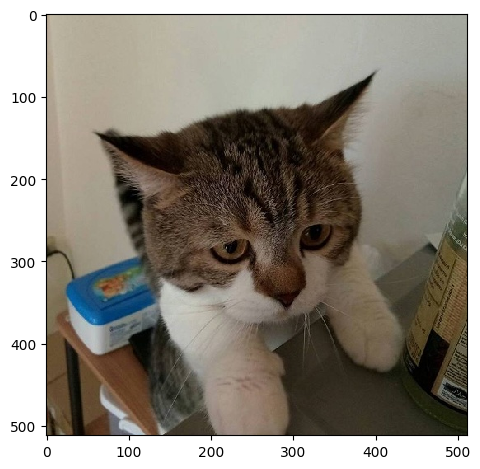

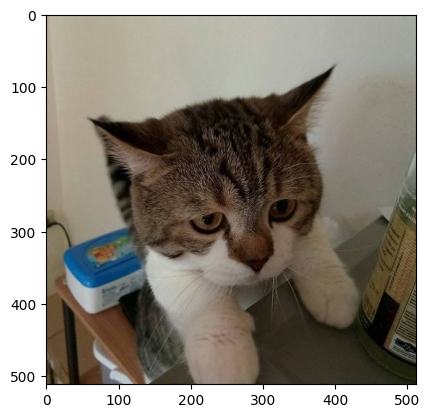

In [15]:
from skimage import io, color
img = io.imread("kitty.jpg")
io.imshow(img)
io.show()

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


display part of image

In [16]:
print(img[0:5,0:5,:])

[[[183 168 147]
  [185 170 149]
  [184 169 148]
  [185 173 151]
  [189 176 157]]

 [[183 168 147]
  [185 170 149]
  [184 169 148]
  [184 172 150]
  [189 176 157]]

 [[183 168 147]
  [184 169 148]
  [184 169 148]
  [183 171 149]
  [188 175 156]]

 [[183 168 147]
  [183 168 147]
  [184 169 148]
  [183 171 149]
  [187 174 155]]

 [[183 168 147]
  [182 167 146]
  [184 169 148]
  [182 170 148]
  [186 173 154]]]


Size of image

In [17]:
print(img.shape)

(512, 512, 3)


Read and display using cv2

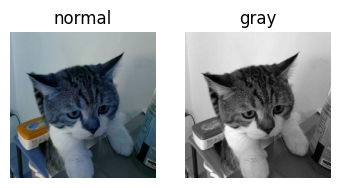

In [18]:
import cv2
image2 = cv2.imread("kitty.jpg")

plt.subplot(1,3,1)
plt.imshow(image2)
plt.axis('off')
plt.title('normal')


# image3 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image3 = image2[:, :, ::-1]
plt.subplot(1,3,2)
plt.imshow(image3)
plt.axis('off')
plt.title('convert bgr -> rgb')

image4 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
plt.plot(1,3,3)
plt.imshow(image4, cmap = 'gray')
plt.axis('off')
plt.title('gray')

plt.show()


## Exercise #2 Dicom file
DICOM® — Digital Imaging and Communications in Medicine — is the international standard for medical images and related information. It defines the formats for medical images that can be exchanged with the data and quality necessary for clinical use.

Ref. https://www.dicomstandard.org

* What is the image size?
  - `128*128`
* What is the datatype of pixel_array ?
  - `np.int26`
* Min/max?
  - Min number = `128`
  - Max number = `2191`
* Try with “MR_small.dcm”
  - `64*64` size
  - type = `int16`
  - Min number = `127`
  - Max number = `2145`



In [19]:
!pip install pydicom

You should consider upgrading via the '/Users/jirayuwat/Desktop/2110431-Intro-Digital-Imaging/env/bin/python3 -m pip install --upgrade pip' command.


Patient's Name...: CompressedSamples^CT1
Patient ID.......: 1CT1
Modality.........: CT
Study Date.......: 20040119
Image size.......: 128 x 128
Pixel Spacing....: [0.661468, 0.661468]


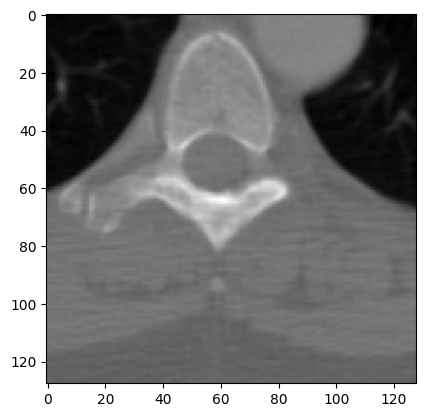

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from pydicom import dcmread
from pydicom.data import get_testdata_file


fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

print(f"Patient's Name...: {ds.PatientName}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()


In [21]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

In [22]:
ds.pixel_array

array([[175, 180, 166, ..., 203, 207, 216],
       [186, 183, 157, ..., 181, 190, 239],
       [184, 180, 171, ..., 152, 164, 235],
       ...,
       [906, 910, 923, ..., 922, 929, 927],
       [914, 954, 938, ..., 942, 925, 905],
       [959, 955, 916, ..., 911, 904, 909]], dtype=int16)

In [23]:
print(f'''Min number = {np.min(ds.pixel_array)}
Max number = {np.max(ds.pixel_array)}
''')

Min number = 128
Max number = 2191



Patient's Name...: CompressedSamples^MR1
Patient ID.......: 4MR1
Modality.........: MR
Study Date.......: 20040826
Image size.......: 64 x 64
Pixel Spacing....: [0.3125, 0.3125]


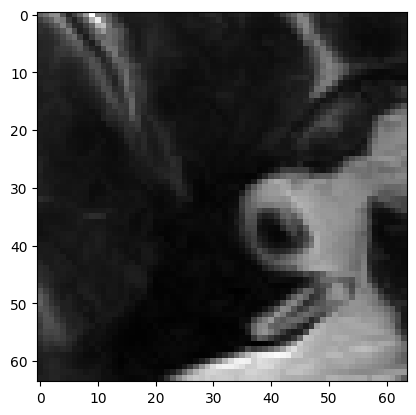

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from pydicom import dcmread
from pydicom.data import get_testdata_file


fpath = get_testdata_file('MR_small.dcm')
ds = dcmread(fpath)

print(f"Patient's Name...: {ds.PatientName}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()


In [25]:
ds.pixel_array

array([[ 905, 1019, 1227, ...,  302,  304,  328],
       [ 628,  770,  907, ...,  298,  331,  355],
       [ 498,  566,  706, ...,  280,  285,  320],
       ...,
       [ 334,  400,  431, ..., 1094, 1068, 1083],
       [ 339,  377,  413, ..., 1318, 1346, 1336],
       [ 378,  374,  422, ..., 1369, 1129,  862]], dtype=int16)

In [26]:
ds.pixel_array.shape

(64, 64)

In [27]:
print(f'''Min number = {np.min(ds.pixel_array)}
Max number = {np.max(ds.pixel_array)}
''')

Min number = 127
Max number = 2145



## Exercise #3 Image Color Visualization
* 0 is always black?
* 255 is  always white?

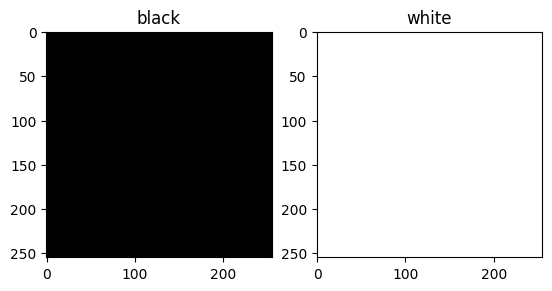

In [28]:
black = np.zeros((255,255), np.int16)
white = np.ones((255,255), np.int16) * 255
plt.subplot(1,2,1)
plt.title('black')
plt.imshow(black,
           cmap = plt.cm.gray,
           vmin = 0,
           vmax = 255)
plt.subplot(1,2,2)
plt.title('white')
plt.imshow(white,
           cmap = plt.cm.gray,
           vmin = 0,
           vmax = 255)

## Exercises # 4
Create  an image of 100x100 which has red color on the half left and cyan color on the half right and display the image


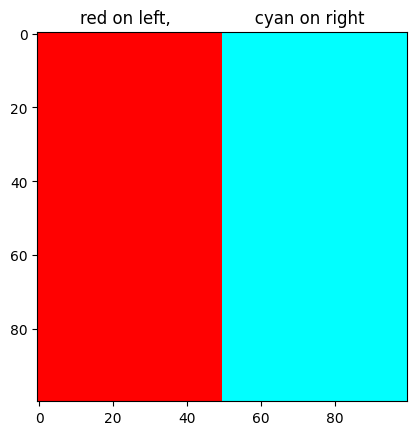

In [29]:
img = np.ones((100, 100, 3))

# draw red
img[:, :50, 1:] /= 255
# draw cyan
img[:, 50:, 0] /= 255

plt.title('red on left,                cyan on right')
plt.imshow(img)